In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read the data
train = pd.read_csv('train.csv')
# read the test data
test = pd.read_csv('test.csv')

In [3]:
# peek the train data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# peek the test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# the number of rows and columns of train data
train.shape

(1460, 81)

In [6]:
# the number of rows and columns of test data
test.shape

(1459, 80)

In [7]:
# check the number of na in the features
# only impute the features that we are interested in

interested_features = ['LotFrontage', 'YearBuilt', 'YearRemodAdd',
                       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 
                       'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces',
                       'GarageYrBlt', 'GarageArea', 'GarageFinish',
                       'GarageCars', 'BsmtFinType1', 'BsmtExposure',
                       'OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 
                       'FullBath', 'HalfBath', 'ExterQual',
                       'KitchenQual']

In [8]:
# first, do the imputation
train[interested_features].isna().sum()

LotFrontage     259
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
GrLivArea         0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageArea        0
GarageFinish     81
GarageCars        0
BsmtFinType1     37
BsmtExposure     38
OverallQual       0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
ExterQual         0
KitchenQual       0
dtype: int64

In [9]:
test[interested_features].isna().sum()

LotFrontage     227
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
BsmtFinSF1        1
TotalBsmtSF       1
GrLivArea         0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageArea        1
GarageFinish     78
GarageCars        1
BsmtFinType1     42
BsmtExposure     44
OverallQual       0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
ExterQual         0
KitchenQual       1
dtype: int64

In [10]:
# we will get clues from train data on how to impute the NaN values
# then we will perform the similar actions on test data

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

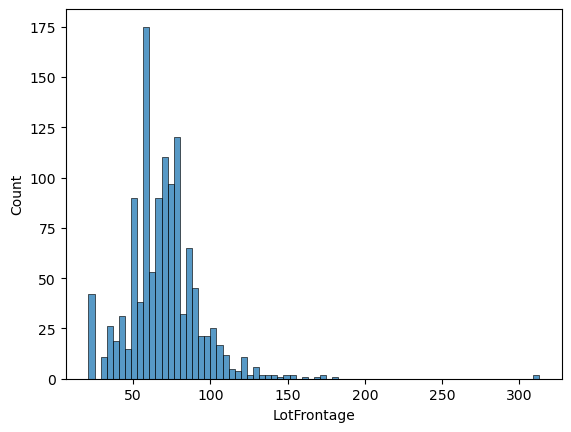

In [11]:
# LotFrontage
# see the distribution of data
sns.histplot(data=train, x='LotFrontage')

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

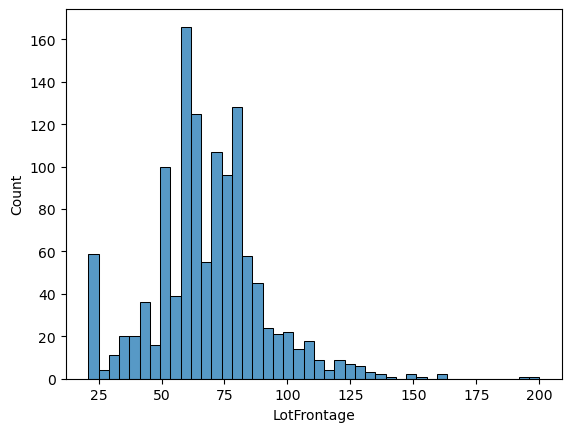

In [12]:
sns.histplot(data=test, x='LotFrontage')

In [13]:
# since there is several outliers which might affect the mean
# it is better to use median to impute the missing values
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

# perform same actions on test data
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

# check LotFrontage after imputation
print(train['LotFrontage'].isna().sum())
print(test['LotFrontage'].isna().sum())

0
0


In [14]:
# MasVnrType and MasVnr Area
# here we assume that MasVnrType is related to the MasVnrArea
# confirm our assumption
train[train['MasVnrType'].isna()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [15]:
test[test['MasVnrType'].isna()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [16]:
# give more sight on the MasVnrType and MasVnrArea's relationship
train[(train['MasVnrType'] == 'None') & (train['MasVnrArea'] == 0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


In [17]:
train[(train['MasVnrType'] == 'None') & (train['MasVnrArea'] != 0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0


In [18]:
# if MasVnrType is NaN, then MasVnrArea is also NaN
# we might assume NaN value might also indicate No masonry veneer
# NaN in MasVnrType can be fill with None
# and the NaN value in MasVnrArea can be set to 0

# 859 MasVnrType=None->MasVnrArea=0 in train data
# only 5 record do not follow the pattern
# these may be typos
# fix the inconsistency
train.loc[(train['MasVnrType'] == 'None') & (train['MasVnrArea'] != 0), 'MasVnrArea'] = 0
test.loc[(test['MasVnrType'] == 'None') & (test['MasVnrArea'] != 0), 'MasVnrArea'] = 0

# impute the values
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

print(train['MasVnrType'].isna().sum())
print(train['MasVnrArea'].isna().sum())
print(test['MasVnrType'].isna().sum())
print(test['MasVnrArea'].isna().sum())

0
0
0
0


In [19]:
# for BsmtFinSF1 and TotalBsmtSF in test data
test[test['BsmtFinSF1'].isna()][['BsmtQual', 'BsmtFinType1', 'BsmtFinSF1',
                                   'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
660,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# since NaN in BsmtQual indicate no basemnt
# we can fill it with 0
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)

In [21]:
# GarageYrBlt, GarageArea, GarageFinish
train[train['GarageYrBlt'].isna()][['GarageType', 'GarageYrBlt', 'GarageArea', 'GarageFinish']]

,GarageType,GarageYrBlt,GarageArea,GarageFinish
39,NaN,NaN,0,NaN
48,NaN,NaN,0,NaN
78,NaN,NaN,0,NaN
88,NaN,NaN,0,NaN
89,NaN,NaN,0,NaN
...,...,...,...,...
1349,NaN,NaN,0,NaN
1407,NaN,NaN,0,NaN
1449,NaN,NaN,0,NaN
1450,NaN,NaN,0,NaN


In [22]:
test[test['GarageYrBlt'].isna()][['GarageType', 'GarageYrBlt', 'GarageArea', 'GarageFinish']]

,GarageType,GarageYrBlt,GarageArea,GarageFinish
53,NaN,NaN,0.0,NaN
71,NaN,NaN,0.0,NaN
79,NaN,NaN,0.0,NaN
92,NaN,NaN,0.0,NaN
96,NaN,NaN,0.0,NaN
...,...,...,...,...
1433,NaN,NaN,0.0,NaN
1449,NaN,NaN,0.0,NaN
1453,NaN,NaN,0.0,NaN
1454,NaN,NaN,0.0,NaN


In [23]:
# it seems that NaN in GarageYrBlt means no garage 
# confirm the assumption
train[(train['GarageType'].isna()) &
      (train['GarageYrBlt'].isna()) &
      (train['GarageArea'] == 0) &
      (train['GarageFinish'].isna())].count()[0]

81

In [24]:
# the assumption hold in train data, however not in test data
# there are 2 exceptions
test[(test['GarageType'].isna()) &
     (test['GarageYrBlt'].isna()) &
     (test['GarageArea'] == 0) &
     (test['GarageFinish'].isna())].count()[0]

76

In [25]:
# first we handle the train data
# since we interpret GarageYrBlt as numerical values
# we can just fill the na values in GarageYrBlt with 0 in train data
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

# for GarageFinish, fill na with 'None'
train['GarageFinish'] = train['GarageFinish'].fillna('None')

In [26]:
# chekc GarageYrBlt, GarageFinish 
print(train['GarageYrBlt'].isna().sum())
print(train['GarageFinish'].isna().sum())

0
0


In [27]:
test['GarageType'].isna().sum()

76

In [28]:
# for GarageType is NaN in test data, fill them like in train data
test.loc[test['GarageType'].isna(), 'GarageArea'] = 0
test.loc[test['GarageType'].isna(), 'GarageFinish'] = 'None'
test.loc[test['GarageType'].isna(), 'GarageYrBlt'] = 0

In [29]:
# peek again
test[test['GarageYrBlt'].isna()][['GarageType', 'GarageFinish', 'GarageYrBlt']]

,GarageType,GarageFinish,GarageYrBlt
666,Detchd,NaN,NaN
1116,Detchd,NaN,NaN


In [30]:
# decided to fill the NaN values with the most frequent built year among detached garages
detchd_freq_YrBlt = test[test['GarageType']=='Detchd']['GarageYrBlt'].mode()
detchd_freq_YrBlt

0    1950.0
Name: GarageYrBlt, dtype: float64

In [31]:
# as well as GarageFinish
detchd_freq_Finish = test[test['GarageType']=='Detchd']['GarageFinish'].mode()
detchd_freq_Finish

0    Unf
Name: GarageFinish, dtype: object

In [32]:
# fill the values found above
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(detchd_freq_YrBlt[0])
test['GarageFinish'] = test['GarageFinish'].fillna(detchd_freq_Finish[0])

In [33]:
# GarageArea in test data
test[test['GarageArea'].isna()][['GarageType', 'GarageArea']]

,GarageType,GarageArea
1116,Detchd,NaN


<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

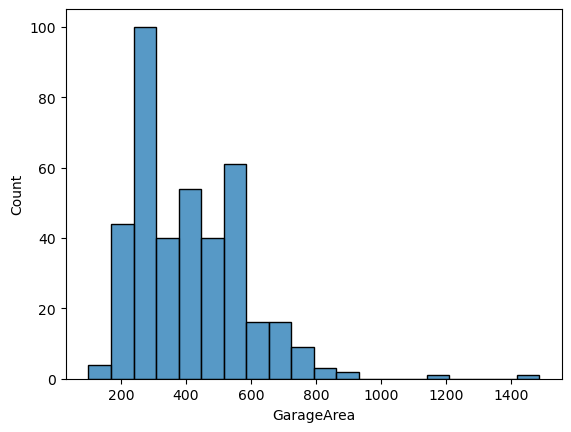

In [34]:
# there is 1 record missing its garage area
# obtain some infomation about the area of detached garage
sns.histplot(data=test[test['GarageType']=='Detchd'],x='GarageArea')

In [35]:
# decided to fill the area with the median of detached garage
detchd_median_Area = test[test['GarageType']=='Detchd']['GarageArea'].median()
test['GarageArea'] = test['GarageArea'].fillna(detchd_median_Area)

In [36]:
# GarageCar has 1 missing value in test data
test[test['GarageCars'].isna()]['GarageArea']

1116    384.0
Name: GarageArea, dtype: float64

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

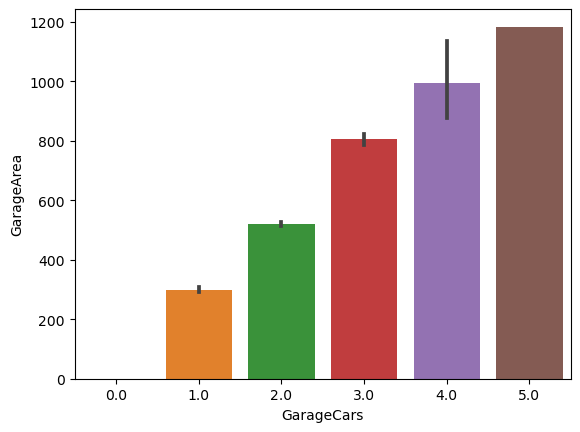

In [37]:
sns.barplot(data=test, x='GarageCars', y='GarageArea')

In [38]:
# for garage area ~ 384SF, the number of cars is 1
test['GarageCars'] = test['GarageCars'].fillna(1)

In [39]:
# for BsmtFinType1
# assume NaN in BsmtFinType1 means no basment
train[train['BsmtFinType1'].isna()][['BsmtQual', 'BsmtFinSF1']]

,BsmtQual,BsmtFinSF1
17,NaN,0
39,NaN,0
90,NaN,0
102,NaN,0
156,NaN,0
182,NaN,0
259,NaN,0
342,NaN,0
362,NaN,0
371,NaN,0


In [40]:
test[test['BsmtFinType1'].isna()][['BsmtQual', 'BsmtFinSF1']]

,BsmtQual,BsmtFinSF1
125,NaN,0.0
133,NaN,0.0
269,NaN,0.0
318,NaN,0.0
354,NaN,0.0
387,NaN,0.0
388,NaN,0.0
396,NaN,0.0
397,NaN,0.0
398,NaN,0.0


In [41]:
# the assumption holds true in both train and test data
# we can fill NaN with None
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')

In [42]:
# check again
print(train['BsmtFinType1'].isna().sum())
print(test['BsmtFinType1'].isna().sum())

0
0


In [43]:
# for BsmtExposure
train[train['BsmtExposure'].isna()][['BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
                                     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,0,0,0,0
39,NaN,NaN,0,0,0,0
90,NaN,NaN,0,0,0,0
102,NaN,NaN,0,0,0,0
156,NaN,NaN,0,0,0,0
182,NaN,NaN,0,0,0,0
259,NaN,NaN,0,0,0,0
342,NaN,NaN,0,0,0,0
362,NaN,NaN,0,0,0,0
371,NaN,NaN,0,0,0,0


In [44]:
test[test['BsmtExposure'].isna()][['BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
                                   'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
27,Gd,NaN,0.0,0.0,1595.0,1595.0
125,NaN,NaN,0.0,0.0,0.0,0.0
133,NaN,NaN,0.0,0.0,0.0,0.0
269,NaN,NaN,0.0,0.0,0.0,0.0
318,NaN,NaN,0.0,0.0,0.0,0.0
354,NaN,NaN,0.0,0.0,0.0,0.0
387,NaN,NaN,0.0,0.0,0.0,0.0
388,NaN,NaN,0.0,0.0,0.0,0.0
396,NaN,NaN,0.0,0.0,0.0,0.0
397,NaN,NaN,0.0,0.0,0.0,0.0


In [45]:
# most of the NaN in BsmtExposure indicates no basement,
# only few of them indicate unfinished basment
# we might assume NaN in BsmtExposure is no basement
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')

In [46]:
# for BsmtFullBath and BsmtHalfBath
test[(test['BsmtFullBath'].isna()) | (test['BsmtHalfBath'].isna())]['BsmtQual']

660    NaN
728    NaN
Name: BsmtQual, dtype: object

In [47]:
# As BsmtQual indicated, there are no basment for above records
# we can fill them with 0
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)

In [48]:
# for KitchenQual, 1 missing value in test data
# decided to fill it with most frequent value
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [49]:
# check if all NaN values in interested features has been cleaned
train[interested_features].isna().sum()

LotFrontage     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
GrLivArea       0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageArea      0
GarageFinish    0
GarageCars      0
BsmtFinType1    0
BsmtExposure    0
OverallQual     0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
ExterQual       0
KitchenQual     0
dtype: int64

In [50]:
test[interested_features].isna().sum()

LotFrontage     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
GrLivArea       0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageArea      0
GarageFinish    0
GarageCars      0
BsmtFinType1    0
BsmtExposure    0
OverallQual     0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
ExterQual       0
KitchenQual     0
dtype: int64

In [51]:
# save the imputed train and test data
train.to_csv('train_i.csv', index=False)
test.to_csv('test_i.csv', index=False)

In [52]:
# after the imputation, do the features scaling and encoding
import numpy as np
from sklearn.preprocessing import RobustScaler

In [53]:
# select the interested features only from test and train data
train = train[interested_features+['SalePrice']]
test = test[interested_features]

In [54]:
# peek the data
train.head()

,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,BsmtFinType1,BsmtExposure,OverallQual,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,ExterQual,KitchenQual,SalePrice
0,65.0,2003,2003,196.0,706,856,1710,8,0,2003.0,...,GLQ,No,7,1,0,2,1,Gd,Gd,208500
1,80.0,1976,1976,0.0,978,1262,1262,6,1,1976.0,...,ALQ,Gd,6,0,1,2,0,TA,TA,181500
2,68.0,2001,2002,162.0,486,920,1786,6,1,2001.0,...,GLQ,Mn,7,1,0,2,1,Gd,Gd,223500
3,60.0,1915,1970,0.0,216,756,1717,7,1,1998.0,...,ALQ,No,7,1,0,1,0,TA,Gd,140000
4,84.0,2000,2000,350.0,655,1145,2198,9,1,2000.0,...,GLQ,Av,8,1,0,2,1,Gd,Gd,250000


In [55]:
test.head()

,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,GarageCars,BsmtFinType1,BsmtExposure,OverallQual,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,ExterQual,KitchenQual
0,80.0,1961,1961,0.0,468.0,882.0,896,5,0,1961.0,...,1.0,Rec,No,5,0.0,0.0,1,0,TA,TA
1,81.0,1958,1958,108.0,923.0,1329.0,1329,6,0,1958.0,...,1.0,ALQ,No,6,0.0,0.0,1,1,TA,Gd
2,74.0,1997,1998,0.0,791.0,928.0,1629,6,1,1997.0,...,2.0,GLQ,No,5,0.0,0.0,2,1,TA,TA
3,78.0,1998,1998,20.0,602.0,926.0,1604,7,1,1998.0,...,2.0,GLQ,No,6,0.0,0.0,2,1,TA,Gd
4,43.0,1992,1992,0.0,263.0,1280.0,1280,5,0,1992.0,...,2.0,ALQ,No,8,0.0,0.0,2,0,Gd,Gd


In [56]:
features_dtype = {'LotFrontage':'float64', 
                    'YearBuilt':'int64', 
                    'YearRemodAdd':'int64',
                    'MasVnrArea':'float64', 
                    'BsmtFinSF1':'float64', 
                    'TotalBsmtSF':'float64', 
                    'GrLivArea':'float64', 
                    'TotRmsAbvGrd':'int64', 
                    'Fireplaces':'int64',
                    'GarageYrBlt':'int64', 
                    'GarageArea':'float64', 
                    'GarageFinish':'category',
                    'GarageCars':'int64',
                    'BsmtFinType1':'category', 
                    'BsmtExposure':'category', 
                    'OverallQual':'category',
                    'ExterQual':'category',
                    'KitchenQual':'category'}

In [57]:
# convert the datatype
train = train.astype(features_dtype)
train.dtypes

LotFrontage      float64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
TotalBsmtSF      float64
GrLivArea        float64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt        int64
GarageArea       float64
GarageFinish    category
GarageCars         int64
BsmtFinType1    category
BsmtExposure    category
OverallQual     category
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
ExterQual       category
KitchenQual     category
SalePrice          int64
dtype: object

In [58]:
test = test.astype(features_dtype)
test.dtypes

LotFrontage      float64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
TotalBsmtSF      float64
GrLivArea        float64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt        int64
GarageArea       float64
GarageFinish    category
GarageCars         int64
BsmtFinType1    category
BsmtExposure    category
OverallQual     category
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
ExterQual       category
KitchenQual     category
dtype: object

In [59]:
# add some new features to the data
# TotalInHouseSF = GrLivArea+TotBsmtSF
train['TotalInHouseSF'] = train['GrLivArea']+train['TotalBsmtSF']
test['TotalInHouseSF'] = test['GrLivArea']+test['TotalBsmtSF']

# we decided to keep GrLivArea abd TotalBsmtSF

# TotalBath = BsmtFullBath+BsmtHalfBath+FullBath+HalfBath
train['TotalFullBath'] = train['BsmtFullBath']+train['FullBath']
train['TotalHalfBath'] = train['BsmtHalfBath']+train['HalfBath']
test['TotalFullBath'] = test['BsmtFullBath']+test['FullBath']
test['TotalHalfBath'] = test['BsmtHalfBath']+test['HalfBath']

# we decided to drop BsmtFullBath, BsmtHalfBath, FullBath, HalfBath
train = train.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], 
           axis='columns')
test = test.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], 
           axis='columns')

In [60]:
# standardize some numerical features
# features that are going to be scaled
scale_features = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1',
                  'TotalBsmtSF', 'GrLivArea', 'GarageArea',
                  'TotalInHouseSF']

# taking log transformation to handle skew issues
train[scale_features+['SalePrice']] = np.log1p(train[scale_features+['SalePrice']])
test[scale_features] = np.log1p(test[scale_features])

# standardize the values 
scaler = RobustScaler()
train[scale_features] = scaler.fit_transform(train[scale_features])
test[scale_features] = scaler.fit_transform(test[scale_features])

In [61]:
# one-hot-encoding the categorical features
cat_features = ['GarageFinish', 'BsmtFinType1', 'BsmtExposure',
                'OverallQual', 'ExterQual', 'KitchenQual']

# encoding the train data and drop the original categorical features
dummies = pd.get_dummies(train[cat_features], prefix=cat_features)
train = pd.concat([train, dummies], axis='columns')
train.drop(columns=cat_features, axis='columns', inplace=True)

# encoding the test data and drop the original categorical features
dummies = pd.get_dummies(test[cat_features], prefix=cat_features)
test = pd.concat([test, dummies], axis='columns')
test.drop(columns=cat_features, axis='columns', inplace=True)

In [62]:
# peek the data
train.head()

,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,OverallQual_9,OverallQual_10,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,-0.217001,2003,2003,1.036882,0.092710,-0.300181,0.342891,8,0,2003,...,0,0,0,0,1,0,0,0,1,0
1,0.538272,1976,1976,0.000000,0.142255,0.492878,-0.327743,6,1,1976,...,0,0,0,0,0,1,0,0,0,1
2,-0.053065,2001,2002,0.999700,0.035971,-0.152897,0.438896,6,1,2001,...,0,0,0,0,1,0,0,0,1,0
3,-0.507542,1915,1970,0.000000,-0.087072,-0.553912,0.351910,7,1,1998,...,0,0,0,0,0,1,0,0,1,0
4,0.716039,2000,2000,1.150238,0.081314,0.294081,0.897190,9,1,2000,...,0,0,0,0,1,0,0,0,1,0


In [63]:
test.head()

,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,OverallQual_9,OverallQual_10,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,0.676562,1961,1961,0.000000,0.043752,-0.223048,-1.085682,5,0,1961,...,0,0,0,0,0,1,0,0,0,1
1,0.724015,1958,1958,0.921001,0.146123,0.582836,-0.172866,6,0,1958,...,0,0,0,0,0,1,0,0,1,0
2,0.378926,1997,1998,0.000000,0.122851,-0.123134,0.298518,6,1,1997,...,0,0,0,0,0,1,0,0,0,1
3,0.579873,1998,1998,0.597698,0.081692,-0.127374,0.262698,7,1,1998,...,0,0,0,0,0,1,0,0,1,0
4,-1.683534,1992,1992,0.000000,-0.043000,0.508982,-0.259860,5,0,1992,...,0,0,0,0,1,0,0,0,1,0


In [64]:
# save the imputed train and test data
train.to_csv('train_m.csv', index=False)
test.to_csv('test_m.csv', index=False)